In [ ]:
# Constants

LEARNING_RATE = 0.05
NUM_ITER = 2048
TARGET_CLASS = 36   # terrapin

ROTATION_DEG = 5
IMG_HEIGHT, IMG_WIDTH = 224, 224
JITTER_PX = 16
SCALE_FACTOR = 0.2

OPTIM_CONV_LAYER = 0
OPTIM_CHANNEL = 4

OPTIM_LIN_LAYER = 1
OPTIM_NODE = 256

In [ ]:
# Imports and Model

import torchvision.models.alexnet as alexnet
from torchvision.models import AlexNet_Weights
from torchvision.transforms import v2
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

model = alexnet(weights = AlexNet_Weights.IMAGENET1K_V1)
model.eval()
preprocess = AlexNet_Weights.IMAGENET1K_V1.transforms()

# Classes

Iteration 100/2048: Loss: -807.9851684570312
Iteration 200/2048: Loss: -926.121337890625
Iteration 300/2048: Loss: -953.0489501953125
Iteration 400/2048: Loss: -968.83154296875
Iteration 500/2048: Loss: -980.569091796875
Iteration 600/2048: Loss: -991.4249267578125
Iteration 700/2048: Loss: -998.9013061523438
Iteration 800/2048: Loss: -1005.1860961914062
Iteration 900/2048: Loss: -1011.0673828125
Iteration 1000/2048: Loss: -1015.6993408203125
Iteration 1100/2048: Loss: -1020.8433837890625
Iteration 1200/2048: Loss: -1026.45751953125
Iteration 1300/2048: Loss: -1032.0225830078125
Iteration 1400/2048: Loss: -1038.197265625
Iteration 1500/2048: Loss: -1042.106689453125
Iteration 1600/2048: Loss: -1044.7811279296875
Iteration 1700/2048: Loss: -1047.0301513671875
Iteration 1800/2048: Loss: -1049.9608154296875
Iteration 1900/2048: Loss: -1052.1688232421875
Iteration 2000/2048: Loss: -1054.4425048828125


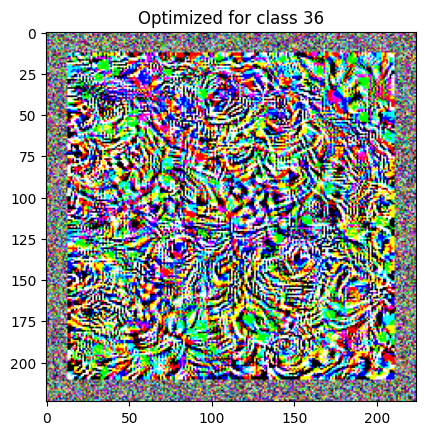

In [ ]:
# Naive

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

for i in range(NUM_ITER):
  optimizer.zero_grad()
  preprocessed_image = preprocess(image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()


  with torch.no_grad():
    image.data.clamp_(0, 1)

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone().squeeze(0)
plt.imshow(TF.to_pil_image(final_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()


Iteration 100/2048: Loss: -180.66921997070312
Iteration 200/2048: Loss: -286.6250305175781
Iteration 300/2048: Loss: -226.67620849609375
Iteration 400/2048: Loss: -278.18524169921875
Iteration 500/2048: Loss: -323.7611389160156
Iteration 600/2048: Loss: -336.082763671875
Iteration 700/2048: Loss: -318.41473388671875
Iteration 800/2048: Loss: -311.84918212890625
Iteration 900/2048: Loss: -344.32958984375
Iteration 1000/2048: Loss: -328.7395935058594
Iteration 1100/2048: Loss: -338.05816650390625
Iteration 1200/2048: Loss: -350.2536926269531
Iteration 1300/2048: Loss: -342.3666076660156
Iteration 1400/2048: Loss: -286.9786376953125
Iteration 1500/2048: Loss: -393.8060302734375
Iteration 1600/2048: Loss: -375.7566223144531
Iteration 1700/2048: Loss: -400.329345703125
Iteration 1800/2048: Loss: -310.9297180175781
Iteration 1900/2048: Loss: -318.5292663574219
Iteration 2000/2048: Loss: -352.70892333984375


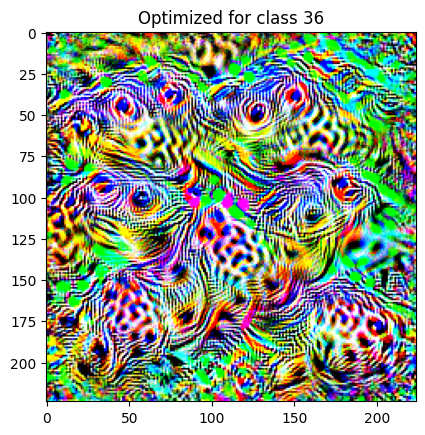

In [ ]:
# Transformation Robustness

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  transformed_image = transforms(image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    image.data.clamp_(0, 1)

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone().squeeze(0)
plt.imshow(TF.to_pil_image(final_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()


Iteration 100/2048: Loss: -621.9552001953125
Iteration 200/2048: Loss: -777.914306640625
Iteration 300/2048: Loss: -820.2814331054688
Iteration 400/2048: Loss: -838.9620361328125
Iteration 500/2048: Loss: -849.7908935546875
Iteration 600/2048: Loss: -856.2243041992188
Iteration 700/2048: Loss: -860.618408203125
Iteration 800/2048: Loss: -863.8082275390625
Iteration 900/2048: Loss: -866.2157592773438
Iteration 1000/2048: Loss: -868.0189208984375
Iteration 1100/2048: Loss: -869.5511474609375
Iteration 1200/2048: Loss: -870.739013671875
Iteration 1300/2048: Loss: -871.7857666015625
Iteration 1400/2048: Loss: -872.4917602539062
Iteration 1500/2048: Loss: -873.076416015625
Iteration 1600/2048: Loss: -873.5677490234375
Iteration 1700/2048: Loss: -873.9554443359375
Iteration 1800/2048: Loss: -874.361328125
Iteration 1900/2048: Loss: -874.6875
Iteration 2000/2048: Loss: -874.928955078125


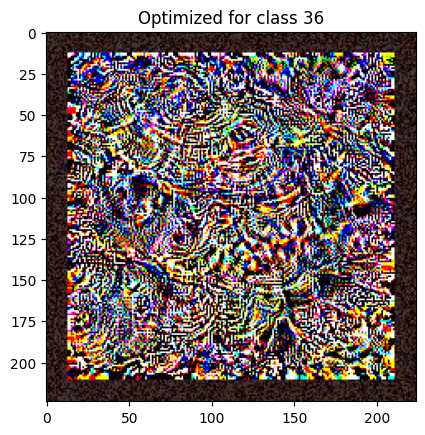

In [ ]:
# Decorrelation

# color correlation matrix for imagenet
# https://github.com/tensorflow/lucid/blob/master/lucid/optvis/param/color.py
LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  preprocessed_image = preprocess(corr_image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()

Iteration 100/2048: Loss: -156.83399963378906
Iteration 200/2048: Loss: -206.0522003173828
Iteration 300/2048: Loss: -231.1455535888672
Iteration 400/2048: Loss: -295.6209716796875
Iteration 500/2048: Loss: -256.9990539550781
Iteration 600/2048: Loss: -306.900146484375
Iteration 700/2048: Loss: -298.0719299316406
Iteration 800/2048: Loss: -282.33697509765625
Iteration 900/2048: Loss: -269.70831298828125
Iteration 1000/2048: Loss: -316.6459655761719
Iteration 1100/2048: Loss: -328.83575439453125
Iteration 1200/2048: Loss: -328.30517578125
Iteration 1300/2048: Loss: -279.6261901855469
Iteration 1400/2048: Loss: -304.2692565917969
Iteration 1500/2048: Loss: -322.58740234375
Iteration 1600/2048: Loss: -292.4201965332031
Iteration 1700/2048: Loss: -309.23504638671875
Iteration 1800/2048: Loss: -321.10247802734375
Iteration 1900/2048: Loss: -370.8692321777344
Iteration 2000/2048: Loss: -292.0955810546875


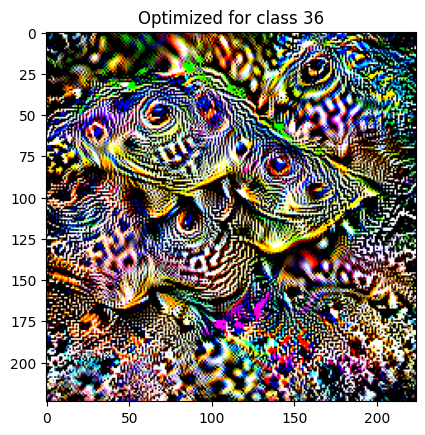

In [ ]:
# Decorrelation + Transformation Robustness

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()

# Channels, Hidden Layer Nodes

In [ ]:
activation = {}

def wrapper(name):
  def hook(module, input, output):
    activation[name] = output
  return hook

conv_indices = [0, 3, 6, 8, 10, 11]
for i in conv_indices:
  model.features[i].register_forward_hook(wrapper("features-" + str(i)))

linear_indices = [1, 4]
for i in linear_indices:
  model.classifier[i].register_forward_hook(wrapper("classifier-"+str(i)))

In [ ]:
# Convolutions

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)
  feature_map = activation["features-"+str(OPTIM_CONV_LAYER)][0, OPTIM_CHANNEL, :, :]

  loss = -torch.mean(feature_map)
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for channel {OPTIM_CHANNEL}")
plt.show()

KeyboardInterrupt: 

Iteration 100/2048: Loss: -171.07164001464844
Iteration 200/2048: Loss: -258.14996337890625
Iteration 300/2048: Loss: -322.2955322265625
Iteration 400/2048: Loss: -386.105224609375
Iteration 500/2048: Loss: -317.87884521484375
Iteration 600/2048: Loss: -378.8658752441406
Iteration 700/2048: Loss: -376.8488464355469
Iteration 800/2048: Loss: -402.2845458984375
Iteration 900/2048: Loss: -410.8412170410156
Iteration 1000/2048: Loss: -394.2375183105469
Iteration 1100/2048: Loss: -428.10772705078125
Iteration 1200/2048: Loss: -436.5751647949219
Iteration 1300/2048: Loss: -423.4132385253906
Iteration 1400/2048: Loss: -391.514404296875
Iteration 1500/2048: Loss: -406.95001220703125
Iteration 1600/2048: Loss: -417.99530029296875
Iteration 1700/2048: Loss: -419.0850830078125
Iteration 1800/2048: Loss: -395.4141540527344
Iteration 1900/2048: Loss: -312.98297119140625
Iteration 2000/2048: Loss: -440.9048767089844


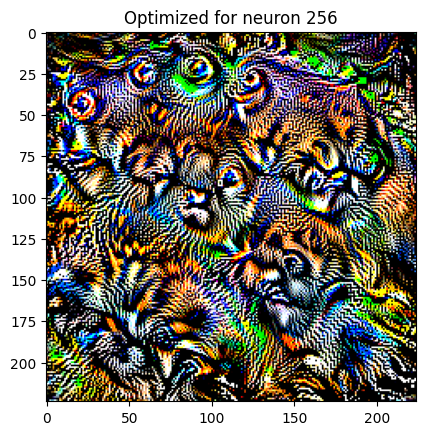

In [ ]:
 # Linear

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)
  feature_map = activation["classifier-" + str(OPTIM_LIN_LAYER)][0, OPTIM_NODE]

  loss = -torch.mean(feature_map)
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for neuron {OPTIM_NODE}")
plt.show()

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# testing whether a channel is active

import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm # For a nice progress bar

CHANNEL_TO_TEST = 0

print("Loading dataset...")
dataset = datasets.CIFAR100(root="./data", train=False, download=True, transform=preprocess)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False)
print("Dataset loaded.")

mean_channel_activations = []

with torch.no_grad():
    for i, (images, labels) in enumerate(tqdm(dataloader, desc="Processing Batches")):
        if i >= 100:
            break

        model(images)

        batch_activations = activation['features-11']

        target_channel_activation = batch_activations[:, CHANNEL_TO_TEST, :, :]

        mean_val = target_channel_activation.mean().item()

        mean_channel_activations.append(mean_val)

results_tensor = torch.tensor(mean_channel_activations)

num_zero_activations = (results_tensor == 0).sum().item()
total_activations = len(results_tensor)
percentage_zero = (num_zero_activations / total_activations) * 100
overall_mean_activation = results_tensor.mean().item()

print("\n--- Test Results ---")
print(f"Tested Channel Index: {CHANNEL_TO_TEST}")
print(f"Number of Batches Processed: {total_activations}")
print(f"Overall Mean Activation: {overall_mean_activation:.8f}")
print(f"Percentage of Batches with Zero Mean Activation: {percentage_zero:.2f}%")

if percentage_zero > 99.0:
    print("\nConclusion: This is very likely a 'dead channel'.")
else:
    print("\nConclusion: This channel is active. The optimization issue is likely due to instability (e.g., learning rate).")

Loading dataset...
Dataset loaded.


Processing Batches:  64%|██████▎   | 100/157 [03:09<01:47,  1.89s/it]


--- Test Results ---
Tested Channel Index: 0
Number of Batches Processed: 100
Overall Mean Activation: 0.12472539
Percentage of Batches with Zero Mean Activation: 0.00%

Conclusion: This channel is active. The optimization issue is likely due to instability (e.g., learning rate).
